<a href="https://colab.research.google.com/github/chowdhury27mykh-cell/Analytics-_1/blob/main/Food_Delivery_RTV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1) Import libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Zomato Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [12]:
#2) Data Cleaning
# Convert timestamps to datetime
df['order_timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Orderd'], errors='coerce')
df['delivered_timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Order_picked'], errors='coerce')

# Use existing 'Time_taken (min)' as delivery duration
df['delivery_duration_min'] = df['Time_taken (min)']

# Remove rows with missing necessary timestamp components or invalid delivery times
df = df.dropna(subset=['order_timestamp', 'delivered_timestamp', 'delivery_duration_min'])
df = df[df['delivery_duration_min'] > 0]

# Define geo columns with correct names
geo_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
df = df.dropna(subset=geo_cols)

# Calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * \
        np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df['distance_km'] = haversine(df['Restaurant_latitude'], df['Restaurant_longitude'],
                             df['Delivery_location_latitude'], df['Delivery_location_longitude'])
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),order_timestamp,delivered_timestamp,delivery_duration_min,distance_km,order_hour
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,motorcycle,3.0,No,Metropolitian,46,2022-12-02 21:55:00,2022-12-02 22:10:00,46,10.280582,21
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,scooter,1.0,No,Metropolitian,21,2022-04-03 17:30:00,2022-04-03 17:40:00,21,13.787860,17
5,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,02-04-2022,20:25,...,electric_scooter,1.0,No,Metropolitian,20,2022-02-04 20:25:00,2022-02-04 20:35:00,20,13.763977,20
6,0x3aab,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,01-03-2022,14:55,...,scooter,1.0,No,Metropolitian,33,2022-01-03 14:55:00,2022-01-03 15:10:00,33,6.218001,14
11,0x5795,RANCHIRES06DEL02,31.0,4.7,23.357804,85.325146,23.487804,85.455146,10-03-2022,22:30,...,electric_scooter,0.0,No,Metropolitian,26,2022-10-03 22:30:00,2022-10-03 22:45:00,26,19.618739,22
12,0x6c6b,COIMBRES13DEL01,37.0,5.0,11.003669,76.976494,11.013669,76.986494,11-03-2022,08:15,...,motorcycle,1.0,No,Metropolitian,20,2022-11-03 08:15:00,2022-11-03 08:30:00,20,1.558132,8
16,0x3231,JAPRES16DEL03,27.0,5.0,26.849596,75.800512,26.879596,75.830512,05-04-2022,20:35,...,motorcycle,0.0,No,Urban,18,2022-05-04 20:35:00,2022-05-04 20:40:00,18,4.470286,20
17,0x8bc0,SURRES15DEL03,35.0,4.3,21.160522,72.771477,21.250522,72.861477,12-03-2022,23:20,...,scooter,0.0,No,Metropolitian,38,2022-12-03 23:20:00,2022-12-03 23:30:00,38,13.682045,23
19,0x3c5e,PUNERES04DEL01,23.0,4.8,18.514210,73.838429,18.624210,73.948429,02-04-2022,23:35,...,electric_scooter,0.0,No,Urban,12,2022-02-04 23:35:00,2022-02-04 23:45:00,12,16.853619,23
20,0x3e60,COIMBRES02DEL03,31.0,4.8,11.022477,76.995667,11.052477,77.025667,01-04-2022,22:35,...,motorcycle,1.0,No,Metropolitian,26,2022-01-04 22:35:00,2022-01-04 22:50:00,26,4.674172,22


/tmp/ipython-input-3870240116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=df, palette='viridis')


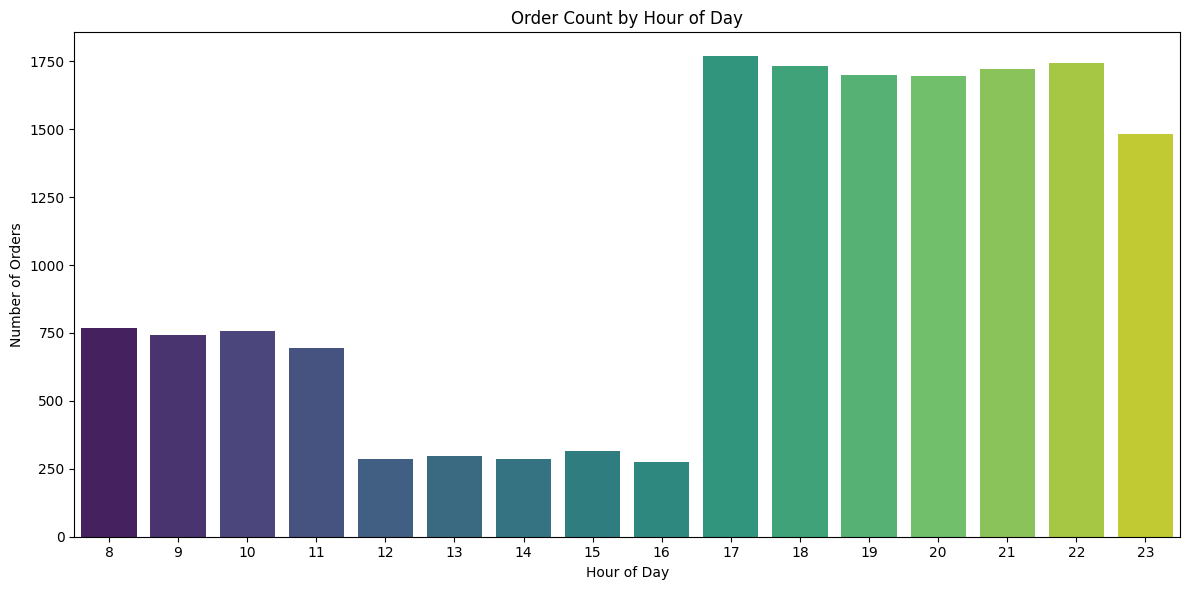

In [3]:
# Study order timings (hour of day)
df['order_hour'] = df['order_timestamp'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour', data=df, palette='viridis')
plt.title('Order Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

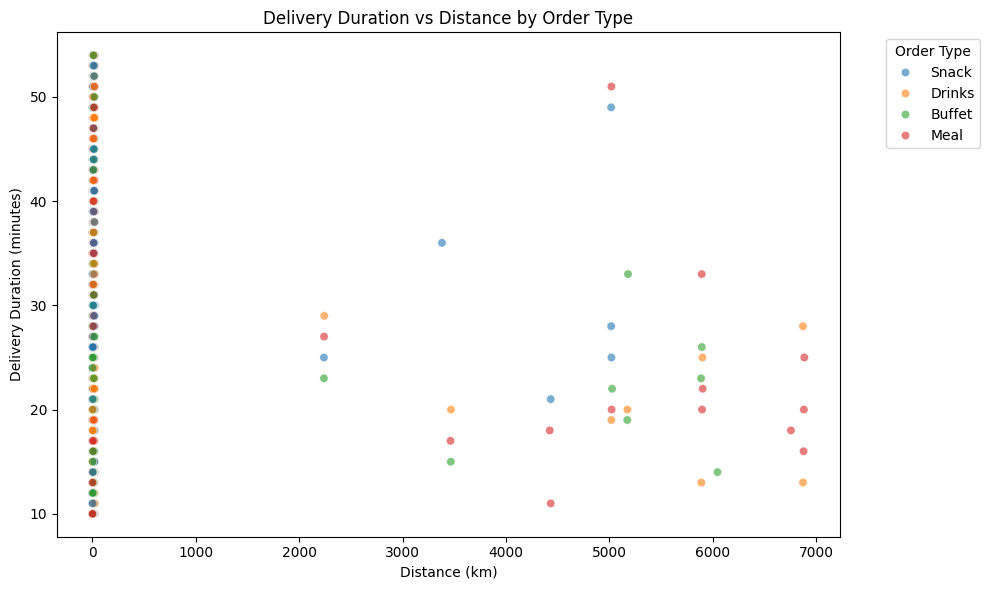

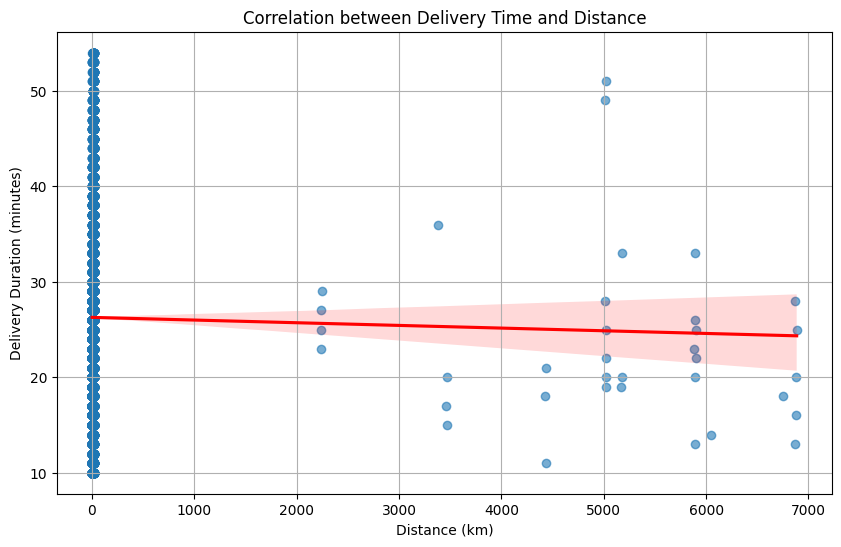

In [5]:
# Analyze delivery duration vs distance
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='distance_km', y='delivery_duration_min', hue='Type_of_order', alpha=0.6)
plt.title('Delivery Duration vs Distance by Order Type')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Duration (minutes)')
plt.legend(title='Order Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='distance_km', y='delivery_duration_min', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Delivery Time and Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Duration (minutes)')
plt.grid(True)
plt.show()

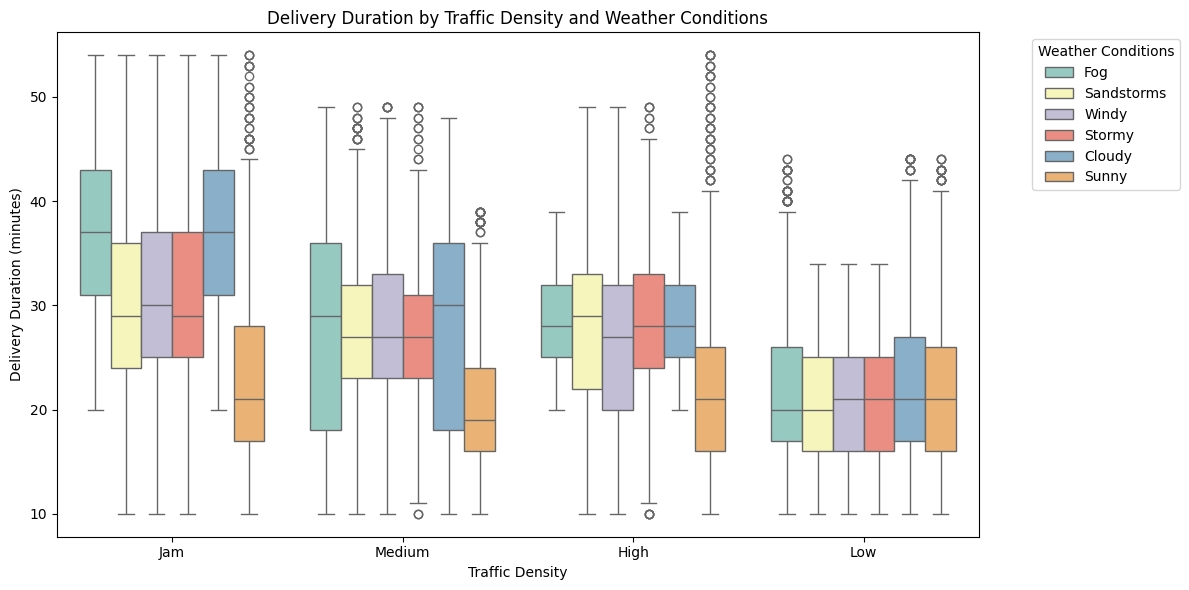

In [6]:
# Identify delay-causing factors: look at traffic density and weather
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Road_traffic_density', y='delivery_duration_min', hue='Weather_conditions', palette='Set3')
plt.title('Delivery Duration by Traffic Density and Weather Conditions')
plt.xlabel('Traffic Density')
plt.ylabel('Delivery Duration (minutes)')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

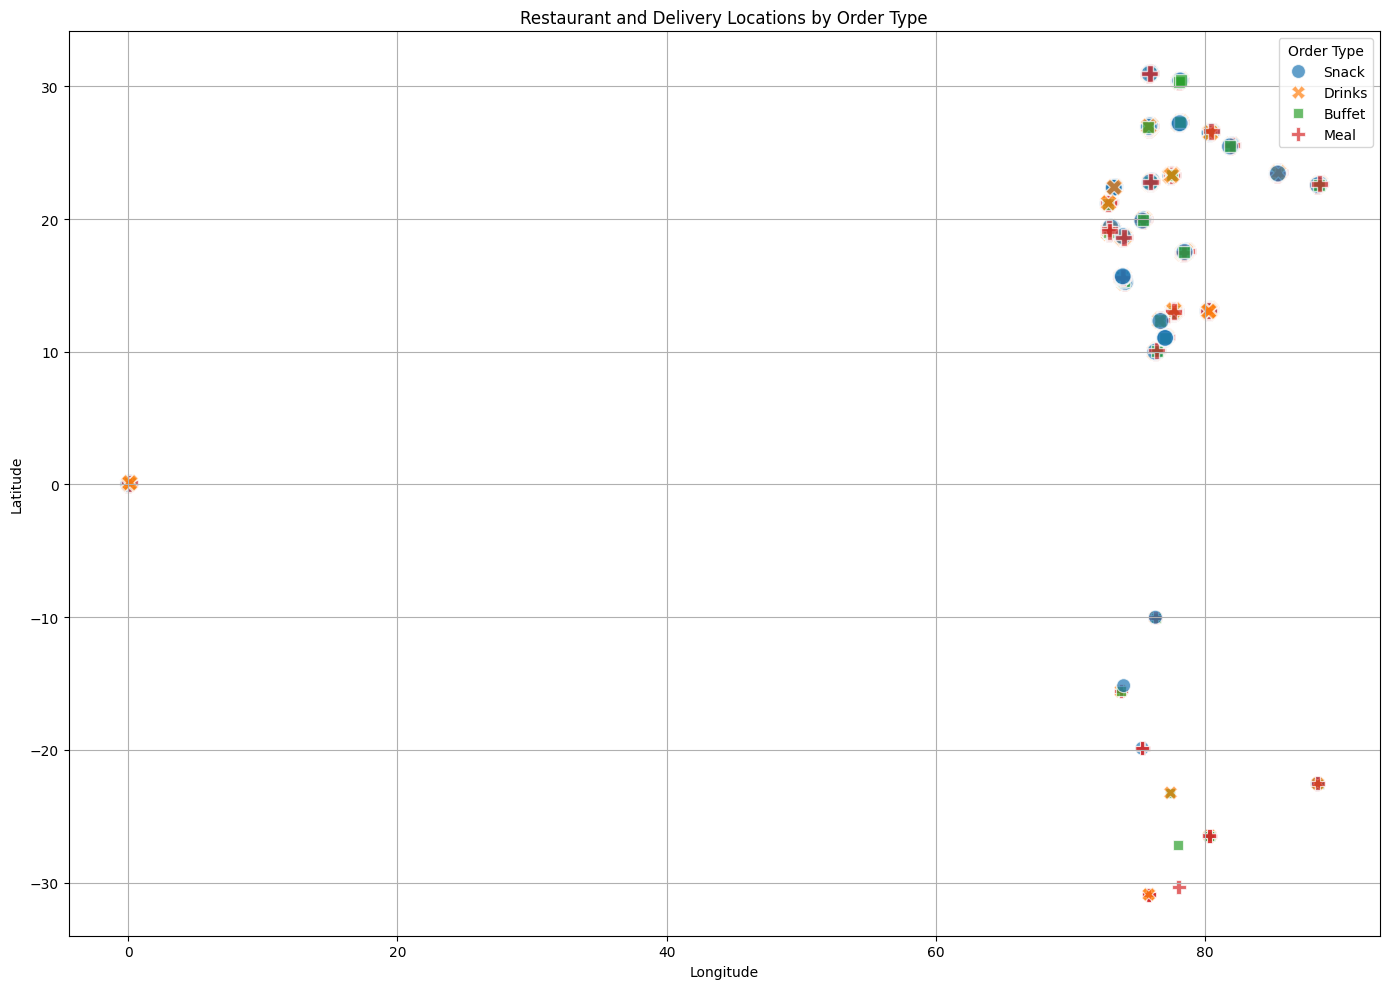

In [7]:
plt.figure(figsize=(14, 10))

# Plot Restaurant Locations by Order Type
sns.scatterplot(data=df, x='Restaurant_longitude', y='Restaurant_latitude', hue='Type_of_order', style='Type_of_order', s=100, alpha=0.7, palette='tab10')

# Plot Delivery Locations by Order Type
sns.scatterplot(data=df, x='Delivery_location_longitude', y='Delivery_location_latitude', hue='Type_of_order', style='Type_of_order', marker='X', s=150, alpha=0.7, palette='tab10', legend=False)

plt.title('Restaurant and Delivery Locations by Order Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Order Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Performance summary for managers
performance_summary = df.groupby('Type_of_order').agg({
    'delivery_duration_min': ['mean', 'median', 'count'],
    'distance_km': ['mean', 'median'],
    'Delivery_person_Ratings': ['mean', 'median']
}).round(2)

performance_summary.columns = ['_'.join(col).strip() for col in performance_summary.columns.values]
print("\nPerformance Summary by Order Type:")
display(performance_summary)

performance_summary.to_csv('zomato_performance_summary.csv')
print("\nPerformance summary saved as 'zomato_performance_summary.csv'")


Performance Summary by Order Type:


,delivery_duration_min_mean,delivery_duration_min_median,delivery_duration_min_count,distance_km_mean,distance_km_median,Delivery_person_Ratings_mean,Delivery_person_Ratings_median
Type_of_order,,,,,,,
Buffet,26.20,25.0,3934,19.61,9.31,4.63,4.7
Drinks,26.34,26.0,4077,19.85,9.22,4.63,4.7
Meal,26.44,26.0,4128,26.55,9.22,4.63,4.7
Snack,26.09,25.0,4125,15.74,9.19,4.64,4.7



Performance summary saved as 'zomato_performance_summary.csv'


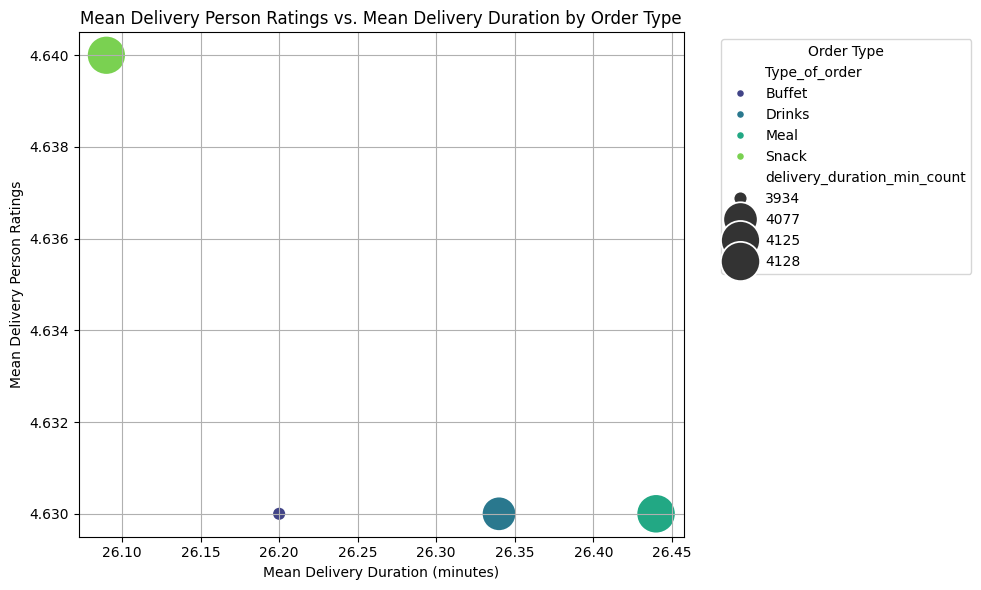

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=performance_summary.reset_index(), # Reset index to make 'Type_of_order' a column for plotting
    x='delivery_duration_min_mean',
    y='Delivery_person_Ratings_mean',
    hue='Type_of_order',
    size='delivery_duration_min_count', # Use count of orders as size for additional context
    sizes=(100, 800), # Define the range for point sizes
    palette='viridis'
)
plt.title('Mean Delivery Person Ratings vs. Mean Delivery Duration by Order Type')
plt.xlabel('Mean Delivery Duration (minutes)')
plt.ylabel('Mean Delivery Person Ratings')
plt.legend(title='Order Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()